# Import Packages

In [7]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [8]:
class_names = ['glaucoma',"normal","cataract","Diabetic retina"]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)

# Loading the Data


In [9]:
def load_data():

    datasets = [r'train', r'test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [10]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading train


100%|██████████| 1074/1074 [00:20<00:00, 52.04it/s]


Loading test


100%|██████████| 1074/1074 [00:21<00:00, 50.41it/s]


In [11]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 4217
Number of testing examples: 4217
Each image is of size: (64, 64)


<Figure size 800x500 with 0 Axes>

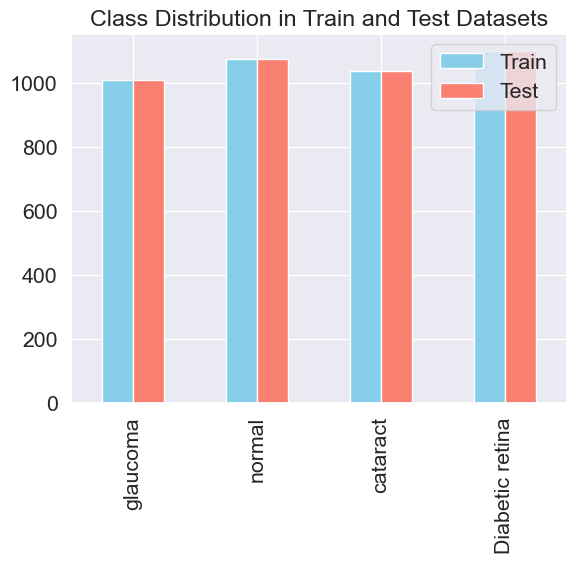

In [12]:

import pandas as pd
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)

# Bar Plot
plt.figure(figsize=(8, 5))
pd.DataFrame({'Train': train_counts, 'Test': test_counts}, index=class_names).plot.bar(color=['skyblue', 'salmon'])
plt.title('Class Distribution in Train and Test Datasets')
plt.show()


In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

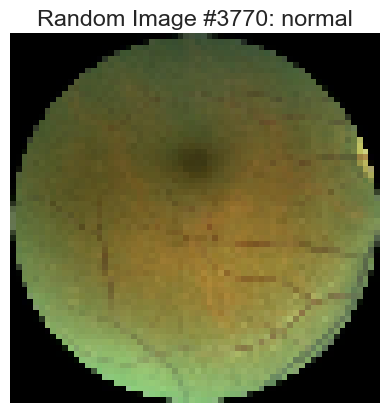

In [14]:
# Display random image from the dataset
def show_random_image(class_names, images, labels):
    idx = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[idx])
    plt.title(f"Random Image #{idx}: {class_names[labels[idx]]}")
    plt.axis('off')
    plt.show()

# Call function
show_random_image(class_names, train_images, train_labels)


In [15]:
def display_examples(class_names, images, labels):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Examples of images of the dataset", fontsize=16)
    for i in range(5):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

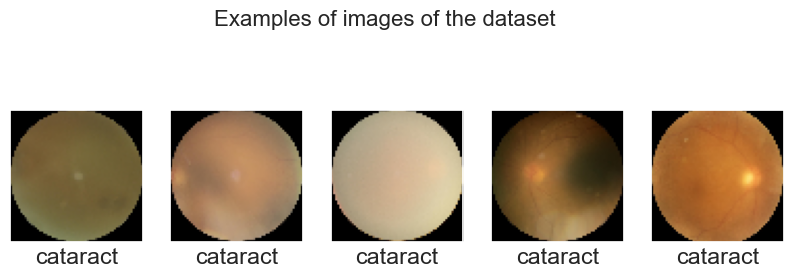

In [16]:
display_examples(class_names, train_images, train_labels)

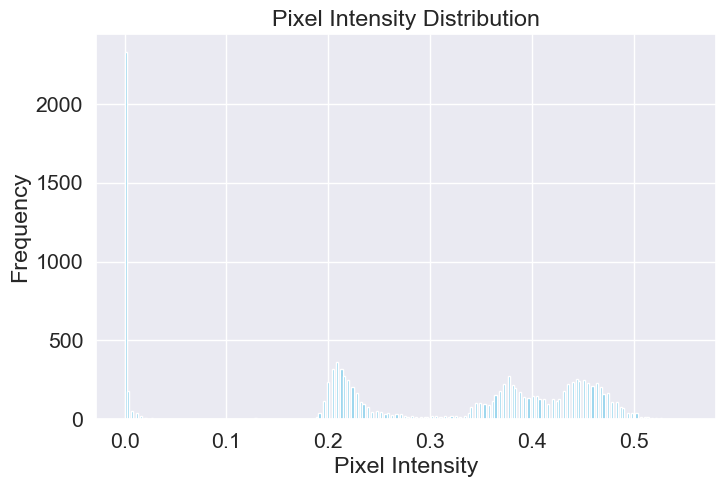

In [17]:
def plot_pixel_intensity_histogram(image):
    plt.figure(figsize=(8, 5))
    plt.hist(image.ravel(), bins=256, color='skyblue')
    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Example with a sample image from train_images
plot_pixel_intensity_histogram(train_images[0])


C:\Users\SRIRA\AppData\Local\Temp\ipykernel_21120\2858814112.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Labels', y='Feature', palette='muted')


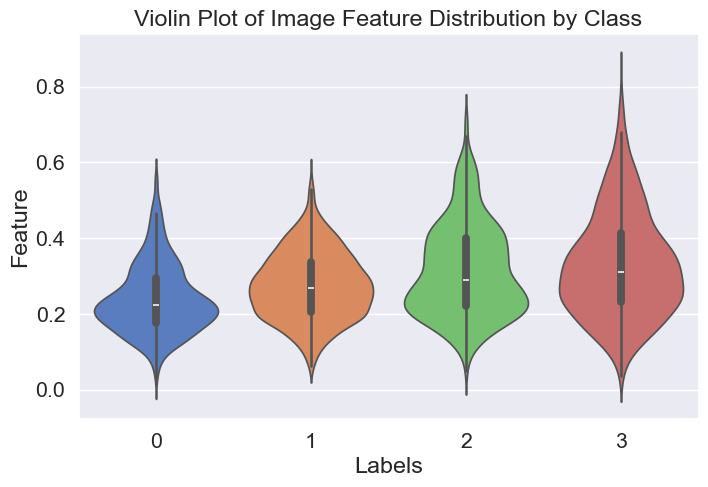

In [18]:
import seaborn as sns
df = pd.DataFrame({'Labels': train_labels, 'Feature': [np.mean(img) for img in train_images]})
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Labels', y='Feature', palette='muted')
plt.title('Violin Plot of Image Feature Distribution by Class')
plt.show()


PROPOSED METHODS

In [19]:
batch_size =15
epochs = 10
IMG_HEIGHT = 64
IMG_WIDTH = 64

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (64,64, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,668 (6.20 MB)

 Trainable params: 1,625,668 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.4573 - loss: 1.1259 - val_accuracy: 0.0000e+00 - val_loss: 2.1474
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.6976 - loss: 0.7367 - val_accuracy: 0.0000e+00 - val_loss: 2.7637
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.7784 - loss: 0.5750 - val_accuracy: 0.0000e+00 - val_loss: 2.2005
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.8183 - loss: 0.4658 - val_accuracy: 0.1659 - val_loss: 1.6266
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.7898 - loss: 0.4847 - val_accuracy: 0.1931 - val_loss: 1.5924
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.8540 - loss: 0.3937 - val_accuracy: 0.2512 - val_loss: 1.6634
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.8579 - loss: 0.3579 - val_accuracy: 0.2962 - val_loss: 1.5185
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.8599 - loss: 0.3471 - val_

In [23]:
test_loss = model.evaluate(test_images, test_labels)

132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8969 - loss: 0.2990


In [24]:
####resnet
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(64,64, 3))

In [25]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in ResNet_model.layers[:-15]:
    layer.trainable = False

x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(4, activation='softmax')(x)
model2 = Model(ResNet_model.input, output)


model2.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 70, 70, 3) │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 32, 32,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 34, 34,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 16, 16,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 16, 16,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 16, 16,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 16, 16,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 16, 16,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 16, 16,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 18, 18,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 16, 16,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 16, 16,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 16, 16,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 16, 16,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 16, 16,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 16, 16,    │          0 │ conv2_block1_0_c

 Total params: 59,645,444 (227.53 MB)

 Trainable params: 6,833,156 (26.07 MB)

 Non-trainable params: 52,812,288 (201.46 MB)

In [26]:
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model2.fit(train_images, train_labels, batch_size=128, epochs=2, validation_split = 0.2)

Epoch 1/2
27/27 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.6177 - loss: 0.9546 - val_accuracy: 0.1872 - val_loss: 7.0285
Epoch 2/2
27/27 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.8718 - loss: 0.3247 - val_accuracy: 0.0355 - val_loss: 9.8820


In [28]:
test_loss = model2.evaluate(test_images, test_labels)

132/132 ━━━━━━━━━━━━━━━━━━━━ 93s 703ms/step - accuracy: 0.8108 - loss: 2.0481 


In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

# Image dimensions for VGG19
height = 64
width = 64
channels = 3
num_classes = 4  # Change according to your dataset

# Input tensor
input_tensor = Input(shape=(height, width, channels))

# Load VGG19 base model
base_model = VGG19(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Add classification head
x = Flatten()(base_model.output)
output = Dense(num_classes, activation='softmax')(x)
model3 = Model(inputs=base_model.input, outputs=output)

# Freeze all layers
for layer in model3.layers:
    layer.trainable = False

# Unfreeze last few layers for fine-tuning
for layer in model3.layers[-16:]:
    layer.trainable = True
    print("Layer '%s' is trainable" % layer.name)

# Compile model
opt = Adam(learning_rate=0.001)
model3.compile(optimizer=opt, loss=categorical_crossentropy, metrics=['accuracy'])

# Model summary
model3.summary()

# Callbacks
checkpoint = ModelCheckpoint("vgg19_disease.h5", monitor='val_accuracy', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto')

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

# Assuming `train_images` and `train_labels` are already loaded
# Resize images to match VGG19 input
train_images_resized = tf.image.resize(train_images, (height, width))

model3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Fit model
history = model3.fit(
    train_images_resized,
    train_labels,
    batch_size=128,
    epochs=2,
    validation_split=0.2,
    callbacks=[checkpoint, early]
)


Layer 'block3_conv2' is trainable
Layer 'block3_conv3' is trainable
Layer 'block3_conv4' is trainable
Layer 'block3_pool' is trainable
Layer 'block4_conv1' is trainable
Layer 'block4_conv2' is trainable
Layer 'block4_conv3' is trainable
Layer 'block4_conv4' is trainable
Layer 'block4_pool' is trainable
Layer 'block5_conv1' is trainable
Layer 'block5_conv2' is trainable
Layer 'block5_conv3' is trainable
Layer 'block5_conv4' is trainable
Layer 'block5_pool' is trainable
Layer 'flatten_3' is trainable
Layer 'dense_8' is trainable


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │         8,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,032,580 (76.42 MB)

 Trainable params: 19,477,252 (74.30 MB)

 Non-trainable params: 555,328 (2.12 MB)

Epoch 1/2


C:\Users\SRIRA\anaconda3\envs\opthalamic\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1150']
Received: inputs=Tensor(shape=(None, 64, 64, 3))
  warnings.warn(msg)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3117 - loss: 21.0128  
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to vgg19_disease.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.3121 - loss: 20.5594 - val_accuracy: 0.0000e+00 - val_loss: 2.4346
Epoch 2/2
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3165 - loss: 1.2883  
Epoch 2: val_accuracy did not improve from 0.00000
27/27 ━━━━━━━━━━━━━━━━━━━━ 115s 4s/step - accuracy: 0.3167 - loss: 1.2879 - val_accuracy: 0.0000e+00 - val_loss: 2.6462


In [30]:
test_loss = model3.evaluate(test_images, test_labels)

132/132 ━━━━━━━━━━━━━━━━━━━━ 59s 449ms/step - accuracy: 0.2725 - loss: 1.2293


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, LayerNormalization
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# Simulate data
X = np.random.rand(1000, 16, 8, 1)
y = np.random.randint(0, 4, size=(1000,))
y_encoded = to_categorical(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define model
model4 = Sequential()
model4.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(16, 8, 1)))
model4.add(LayerNormalization())
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(y_encoded.shape[1], activation='softmax'))

# Compile
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model4.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2681 - loss: 2.6444 - val_accuracy: 0.2450 - val_loss: 1.3937
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3168 - loss: 1.4390 - val_accuracy: 0.2950 - val_loss: 1.3998
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2509 - loss: 1.4158 - val_accuracy: 0.2800 - val_loss: 1.3869
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3025 - loss: 1.3701 - val_accuracy: 0.2550 - val_loss: 1.3896
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3183 - loss: 1.3718 - val_accuracy: 0.2300 - val_loss: 1.3867
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3190 - loss: 1.3574 - val_accuracy: 0.2150 - val_loss: 1.4161
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3255 - loss: 1.3083 - val_accuracy: 0.2600 - val_loss: 1.4563
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3338 - loss: 1.3073 - val_accuracy: 0.2700 - v

C:\Users\SRIRA\anaconda3\envs\opthalamic\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1150']
Received: inputs=Tensor(shape=(32, 64, 64, 3))
  warnings.warn(msg)


132/132 ━━━━━━━━━━━━━━━━━━━━ 58s 439ms/step


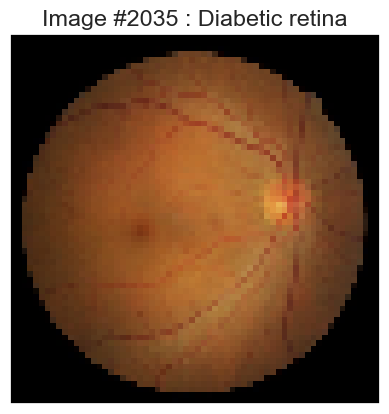

In [32]:
# Make predictions on test set
predictions = model3.predict(test_images)  # Get softmax probabilities
pred_labels = np.argmax(predictions, axis=1)  # Get predicted class indices

# Choose a random index
index = np.random.randint(test_images.shape[0])

# If images are grayscale, squeeze the last channel
image = test_images[index]
if image.shape[-1] == 1:
    image = np.squeeze(image, axis=-1)

# Plot the image
plt.figure()
plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title(f'Image #{index} : {class_names[pred_labels[index]]}')
plt.show()


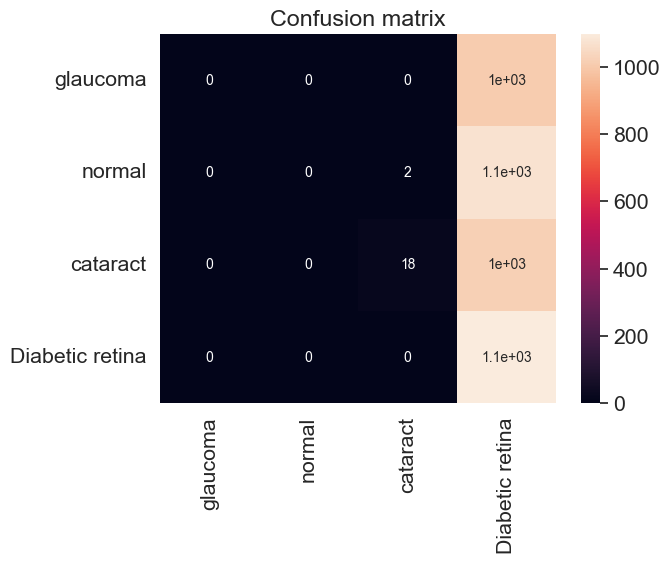

In [33]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [34]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Assuming CM is your confusion matrix, and you have class_names defined

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(test_labels, pred_labels, average='weighted')
overall_recall = recall_score(test_labels, pred_labels, average='weighted')
overall_f1 = f1_score(test_labels, pred_labels, average='weighted')

# Calculate custom accuracy
custom_accuracy = accuracy_score(test_labels, pred_labels)

print(f'Precision: {overall_precision}')
print(f'Recall: {overall_recall}')
print(f'F1 Score: {overall_f1}')
print(f'Custom Accuracy: {custom_accuracy}')

Precision: 0.2896499294950169
Recall: 0.26464311121650463
F1 Score: 0.11636091414482445
Custom Accuracy: 0.26464311121650463


C:\Users\SRIRA\anaconda3\envs\opthalamic\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
# Generate and print classification report
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels, target_names=class_names))


Classification Report:
                 precision    recall  f1-score   support

       glaucoma       0.00      0.00      0.00      1007
         normal       0.00      0.00      0.00      1074
       cataract       0.90      0.02      0.03      1038
Diabetic retina       0.26      1.00      0.41      1098

       accuracy                           0.26      4217
      macro avg       0.29      0.25      0.11      4217
   weighted avg       0.29      0.26      0.12      4217



C:\Users\SRIRA\anaconda3\envs\opthalamic\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SRIRA\anaconda3\envs\opthalamic\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SRIRA\anaconda3\envs\opthalamic\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

C:\Users\SRIRA\anaconda3\envs\opthalamic\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SRIRA\anaconda3\envs\opthalamic\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SRIRA\anaconda3\envs\opthalamic\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

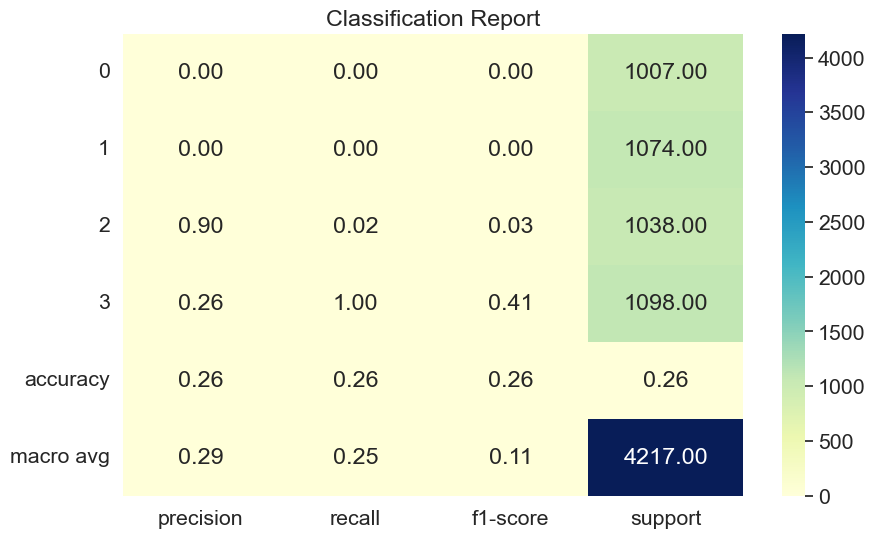

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Assuming test_labels and pred_labels are available

# Generate classification report
report = classification_report(test_labels, pred_labels, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report')
plt.show()

In [37]:
model2.save_weights("model_vgg.weights.h5")
print("Saved model to disk")

Saved model to disk


In [38]:
model_json=model2.to_json()
with open("model_vgg.json", "w") as json_file:
    json_file.write(model_json)